In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import initdirs

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [3]:
from epypes import compgraph

from visioncg import regions
from visioncg import circles
from visioncg import improc
from visioncg import io
from visioncg import viz

In [4]:
im = data.coins()

In [5]:
def get_circle_data_from_keypoints(keypoints):

    circles = [[p.pt[0], p.pt[1], p.size / 2.] for p in keypoints]
    return np.array(circles)

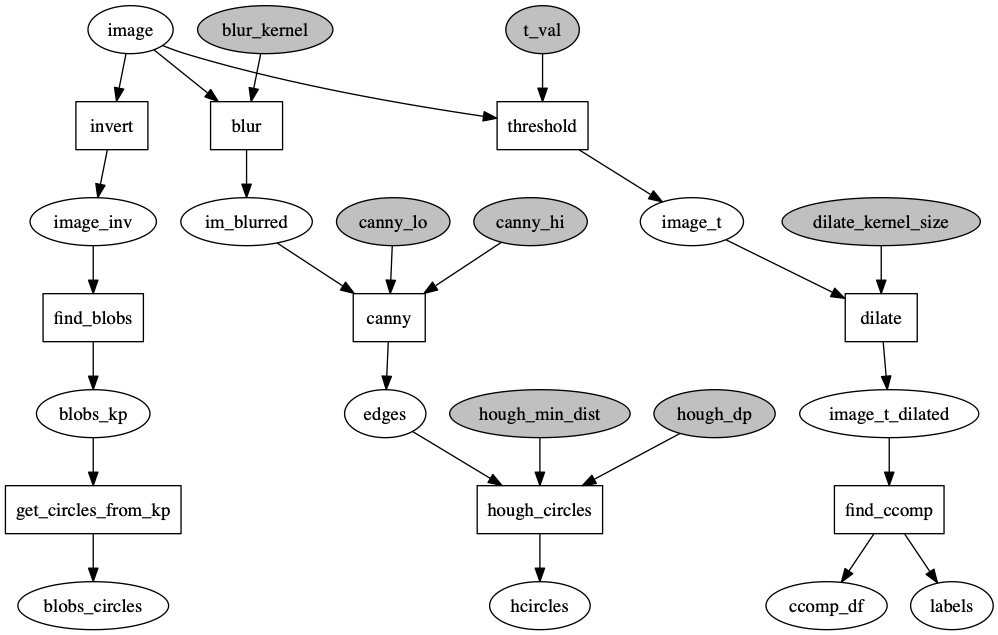

In [6]:
func_dict = {
    'threshold': regions.threshold_binary,
    'invert': improc.invert,
    'hough_circles': circles.hough_circles,
    'blur': improc.gaussian_blur,
    'find_blobs': circles.detect_circular_blobs,
    'canny': cv2.Canny,
    'get_circles_from_kp': get_circle_data_from_keypoints,
    'dilate': improc.dilate,
    'find_ccomp': regions.find_ccomp,
}

func_io = {
    'threshold': (('image', 't_val'), 'image_t'),
    'invert': ('image', 'image_inv'),
    'hough_circles': (('edges', 'hough_dp', 'hough_min_dist'), 'hcircles'),
    'blur': (('image', 'blur_kernel'), 'im_blurred'),
    'find_blobs': ('image_inv', 'blobs_kp'),
    'get_circles_from_kp': ('blobs_kp', 'blobs_circles'),
    'canny': (('im_blurred', 'canny_lo', 'canny_hi'), 'edges'),
    'dilate': (('image_t', 'dilate_kernel_size'), 'image_t_dilated'),
    'find_ccomp': ('image_t_dilated', ('labels', 'ccomp_df')),
    
}

params = {
    't_val': 120,
    'hough_dp': 2,
    'hough_min_dist': 5,
    'blur_kernel': 13,
    'canny_lo': 100,
    'canny_hi': 150,
    'dilate_kernel_size': 5,
}

cg = compgraph.CompGraph(func_dict, func_io)
runner = compgraph.CompGraphRunner(cg, params)

nxpd.draw(runner.to_networkx())

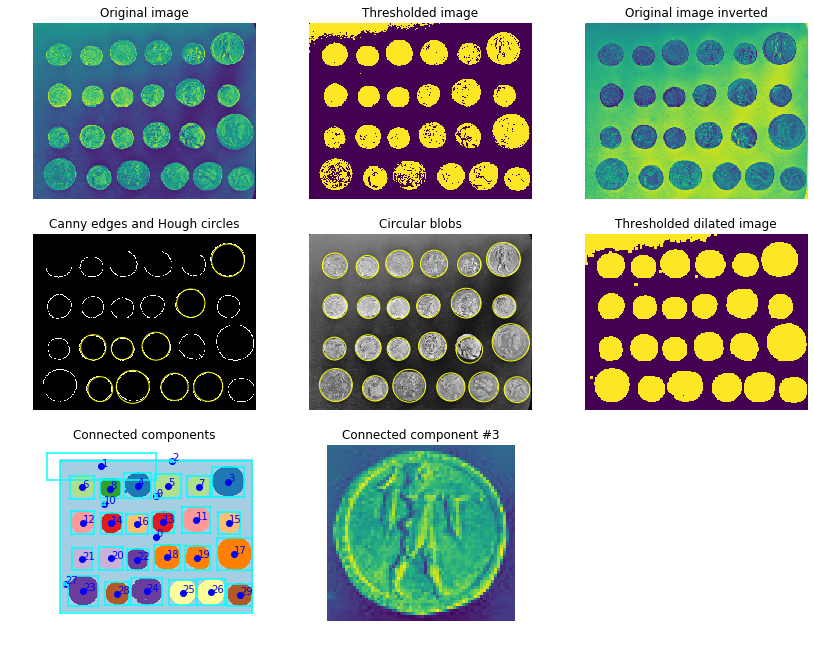

In [7]:
runner.run(image=im)

plt.figure(figsize=(14, 11))

plt.subplot(3, 3, 1)
_ = plt.imshow(runner['image'], vmin=0, vmax=255)
_ = plt.axis('off')
_ = plt.title('Original image')

plt.subplot(3, 3, 2)
_ = plt.imshow(runner['image_t'])
_ = plt.axis('off')
_ = plt.title('Thresholded image')

plt.subplot(3, 3, 3)
_ = plt.imshow(runner['image_inv'])
_ = plt.axis('off')
_ = plt.title('Original image inverted')

plt.subplot(3, 3, 4)
plt.imshow(runner['edges'], cmap='gray')
viz.plot_circles(runner['hcircles'], color='yellow')
_ = plt.axis('off')
_ = plt.title('Canny edges and Hough circles')

plt.subplot(3, 3, 5)
_ = plt.imshow(runner['image'], cmap='gray')
viz.plot_circles(runner['blobs_circles'], color='yellow')
_ = plt.axis('off')
_ = plt.title('Circular blobs')

plt.subplot(3, 3, 6)
_ = plt.imshow(runner['image_t_dilated'])
_ = plt.axis('off')
_ = plt.title('Thresholded dilated image')

plt.subplot(3, 3, 7)
_ = plt.imshow(runner['labels'], cmap='Paired')
_ = plt.axis('off')
viz.plot_ccomp(runner['ccomp_df'], color_centroids='blue')
_ = plt.title('Connected components')

plt.subplot(3, 3, 8)
_ = plt.imshow(regions.ccomp_bbox_subimage(im, runner['ccomp_df'], 3))
_ = plt.axis('off')
_ = plt.title('Connected component #3')